# Keras - Dense neural network (Advanced)

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_ytrevikna_advanced.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 70 columns):
YVIK-YtreVikna1.-G1-T4015A3 -0104    4953 non-null float64
RRS.S2502.Gunit.M1 G1.AVL            5236 non-null int64
YVIK-YtreVikna1.-G2-T4015A3 -0104    5221 non-null float64
RRS.S2502.Gunit.M2 G1.AVL            5236 non-null int64
YVIK-YtreVikna1.-G3-T4015A3 -0104    5221 non-null float64
RRS.S2502.Gunit.M3 G1.AVL            5236 non-null int64
YVIK-YtreVikna1.-G4-T4015A3 -0104    5221 non-null float64
RRS.S2502.Gunit.M4 G1.AVL            5236 non-null int64
YVIK-YtreVikna1.-G5-T4015A3 -0104    5221 non-null float64
RRS.S2502.Gunit.M5 G1.AVL            5236 non-null int64
YVIK-YtreVikna1.-G6-T4015A3 -0104    5221 non-null float64
RRS.S2502.Gunit.M6 G1.AVL            5236 non-null int64
YVIK-YtreVikna1.-G7-T4015A3 -0104    5221 non-null float64
RRS.S2502.Gunit.M7 G1.AVL            5236 non-null int64
YVIK-YtreVikna1.-G8-T4015A3 -0104    5221 non-null float64
RRS.S2502.Gunit.M8 G1.

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 5 to 5235
Data columns (total 70 columns):
YVIK-YtreVikna1.-G1-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M1 G1.AVL            4893 non-null int64
YVIK-YtreVikna1.-G2-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M2 G1.AVL            4893 non-null int64
YVIK-YtreVikna1.-G3-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M3 G1.AVL            4893 non-null int64
YVIK-YtreVikna1.-G4-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M4 G1.AVL            4893 non-null int64
YVIK-YtreVikna1.-G5-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M5 G1.AVL            4893 non-null int64
YVIK-YtreVikna1.-G6-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M6 G1.AVL            4893 non-null int64
YVIK-YtreVikna1.-G7-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M7 G1.AVL            4893 non-null int64
YVIK-YtreVikna1.-G8-T4015A3 -0104    4893 non-null float64
RRS.S2502.Gunit.M8 G1.

In [4]:
num_features = len(data.columns) -1
print(num_features)

69


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [8]:
import tensorflow as tf

c:\users\fabiansd\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=32, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_advanced.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3425 samples, validate on 1468 samples
Epoch 1/10000
Epoch 00001: val_loss improved from inf to 16.35470, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 16.5440 - val_loss: 16.3547
Epoch 2/10000
Epoch 00002: val_loss improved from 16.35470 to 16.31964, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 16.5053 - val_loss: 16.3196
Epoch 3/10000
Epoch 00003: val_loss improved from 16.31964 to 16.28475, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 16.4703 - val_loss: 16.2847
Epoch 4/10000
Epoch 00004: val_loss improved from 16.28475 to 16.24991, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 16.4354 - val_loss: 16.2499
Epoch 5/10000
Epoch 00005: val_loss improved from 16.24991 to 16.21515, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 16.4006 - val_loss: 16.2151
Epoch 6/10000
Epoch 00006: val_loss improved from 16.21515 to 16.18036, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 16.3658 - val_loss: 16.1804
Epo

Epoch 52/10000
Epoch 00052: val_loss improved from 14.67727 to 14.64562, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 14.8248 - val_loss: 14.6456
Epoch 53/10000
Epoch 00053: val_loss improved from 14.64562 to 14.61406, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 14.7929 - val_loss: 14.6141
Epoch 54/10000
Epoch 00054: val_loss improved from 14.61406 to 14.58268, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 14.7612 - val_loss: 14.5827
Epoch 55/10000
Epoch 00055: val_loss improved from 14.58268 to 14.55143, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 14.7295 - val_loss: 14.5514
Epoch 56/10000
Epoch 00056: val_loss improved from 14.55143 to 14.52052, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 14.6980 - val_loss: 14.5205
Epoch 57/10000
Epoch 00057: val_loss improved from 14.52052 to 14.48981, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 14.6666 - val_loss: 14.4898
Epoch 58/10000
Epoch 00058: val_loss imp

Epoch 00103: val_loss improved from 13.39040 to 13.36965, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 13.5306 - val_loss: 13.3697
Epoch 104/10000
Epoch 00104: val_loss improved from 13.36965 to 13.34909, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 13.5097 - val_loss: 13.3491
Epoch 105/10000
Epoch 00105: val_loss improved from 13.34909 to 13.32892, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 13.4890 - val_loss: 13.3289
Epoch 106/10000
Epoch 00106: val_loss improved from 13.32892 to 13.30856, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 13.4685 - val_loss: 13.3086
Epoch 107/10000
Epoch 00107: val_loss improved from 13.30856 to 13.28847, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 13.4480 - val_loss: 13.2885
Epoch 108/10000
Epoch 00108: val_loss improved from 13.28847 to 13.26829, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 13.4277 - val_loss: 13.2683
Epoch 109/10000
Epoch 00109: val_loss improved fro

Epoch 154/10000
Epoch 00154: val_loss improved from 12.47698 to 12.46115, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 12.6033 - val_loss: 12.4612
Epoch 155/10000
Epoch 00155: val_loss improved from 12.46115 to 12.44541, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 12.5873 - val_loss: 12.4454
Epoch 156/10000
Epoch 00156: val_loss improved from 12.44541 to 12.43005, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 12.5714 - val_loss: 12.4301
Epoch 157/10000
Epoch 00157: val_loss improved from 12.43005 to 12.41483, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 12.5558 - val_loss: 12.4148
Epoch 158/10000
Epoch 00158: val_loss improved from 12.41483 to 12.39938, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 12.5403 - val_loss: 12.3994
Epoch 159/10000
Epoch 00159: val_loss improved from 12.39938 to 12.38446, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 12.5248 - val_loss: 12.3845
Epoch 160/10000
Epoch 00160: val_l

Epoch 205/10000
Epoch 00205: val_loss improved from 11.79253 to 11.78137, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.8950 - val_loss: 11.7814
Epoch 206/10000
Epoch 00206: val_loss improved from 11.78137 to 11.77043, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.8831 - val_loss: 11.7704
Epoch 207/10000
Epoch 00207: val_loss improved from 11.77043 to 11.75964, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.8716 - val_loss: 11.7596
Epoch 208/10000
Epoch 00208: val_loss improved from 11.75964 to 11.74896, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.8600 - val_loss: 11.7490
Epoch 209/10000
Epoch 00209: val_loss improved from 11.74896 to 11.73804, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.8487 - val_loss: 11.7380
Epoch 210/10000
Epoch 00210: val_loss improved from 11.73804 to 11.72733, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.8372 - val_loss: 11.7273
Epoch 211/10000
Epoch 00211: val_l

Epoch 256/10000
Epoch 00256: val_loss improved from 11.30916 to 11.30083, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.3949 - val_loss: 11.3008
Epoch 257/10000
Epoch 00257: val_loss improved from 11.30083 to 11.29240, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.3868 - val_loss: 11.2924
Epoch 258/10000
Epoch 00258: val_loss improved from 11.29240 to 11.28441, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.3785 - val_loss: 11.2844
Epoch 259/10000
Epoch 00259: val_loss improved from 11.28441 to 11.27661, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.3706 - val_loss: 11.2766
Epoch 260/10000
Epoch 00260: val_loss improved from 11.27661 to 11.26832, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.3627 - val_loss: 11.2683
Epoch 261/10000
Epoch 00261: val_loss improved from 11.26832 to 11.26062, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.3547 - val_loss: 11.2606
Epoch 262/10000
Epoch 00262: val_l

Epoch 307/10000
Epoch 00307: val_loss improved from 10.97340 to 10.96805, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.0473 - val_loss: 10.9681
Epoch 308/10000
Epoch 00308: val_loss improved from 10.96805 to 10.96302, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.0415 - val_loss: 10.9630
Epoch 309/10000
Epoch 00309: val_loss improved from 10.96302 to 10.95811, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.0360 - val_loss: 10.9581
Epoch 310/10000
Epoch 00310: val_loss improved from 10.95811 to 10.95307, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.0305 - val_loss: 10.9531
Epoch 311/10000
Epoch 00311: val_loss improved from 10.95307 to 10.94800, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.0249 - val_loss: 10.9480
Epoch 312/10000
Epoch 00312: val_loss improved from 10.94800 to 10.94287, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 11.0194 - val_loss: 10.9429
Epoch 313/10000
Epoch 00313: val_l

Epoch 358/10000
Epoch 00358: val_loss improved from 10.76164 to 10.75910, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.8211 - val_loss: 10.7591
Epoch 359/10000
Epoch 00359: val_loss improved from 10.75910 to 10.75633, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.8182 - val_loss: 10.7563
Epoch 360/10000
Epoch 00360: val_loss improved from 10.75633 to 10.75359, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.8153 - val_loss: 10.7536
Epoch 361/10000
Epoch 00361: val_loss improved from 10.75359 to 10.75089, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.8123 - val_loss: 10.7509
Epoch 362/10000
Epoch 00362: val_loss improved from 10.75089 to 10.74805, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.8094 - val_loss: 10.7480
Epoch 363/10000
Epoch 00363: val_loss improved from 10.74805 to 10.74519, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.8064 - val_loss: 10.7452
Epoch 364/10000
Epoch 00364: val_l

Epoch 409/10000
Epoch 00409: val_loss improved from 10.65688 to 10.65559, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.7065 - val_loss: 10.6556
Epoch 410/10000
Epoch 00410: val_loss improved from 10.65559 to 10.65441, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.7050 - val_loss: 10.6544
Epoch 411/10000
Epoch 00411: val_loss improved from 10.65441 to 10.65307, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.7035 - val_loss: 10.6531
Epoch 412/10000
Epoch 00412: val_loss improved from 10.65307 to 10.65176, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.7020 - val_loss: 10.6518
Epoch 413/10000
Epoch 00413: val_loss improved from 10.65176 to 10.65050, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.7007 - val_loss: 10.6505
Epoch 414/10000
Epoch 00414: val_loss improved from 10.65050 to 10.64930, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.6994 - val_loss: 10.6493
Epoch 415/10000
Epoch 00415: val_l

Epoch 460/10000
Epoch 00460: val_loss improved from 10.61741 to 10.61715, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.6549 - val_loss: 10.6171
Epoch 461/10000
Epoch 00461: val_loss improved from 10.61715 to 10.61690, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.6543 - val_loss: 10.6169
Epoch 462/10000
Epoch 00462: val_loss improved from 10.61690 to 10.61662, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.6537 - val_loss: 10.6166
Epoch 463/10000
Epoch 00463: val_loss improved from 10.61662 to 10.61628, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.6531 - val_loss: 10.6163
Epoch 464/10000
Epoch 00464: val_loss improved from 10.61628 to 10.61612, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.6525 - val_loss: 10.6161
Epoch 465/10000
Epoch 00465: val_loss improved from 10.61612 to 10.61580, saving model to checkpoint_model_advanced.h5
 - 0s - loss: 10.6520 - val_loss: 10.6158
Epoch 466/10000
Epoch 00466: val_l

Epoch 00525: val_loss did not improve
 - 0s - loss: 10.6364 - val_loss: 10.6137
Epoch 526/10000
Epoch 00526: val_loss did not improve
 - 0s - loss: 10.6363 - val_loss: 10.6138
Epoch 527/10000
Epoch 00527: val_loss did not improve
 - 0s - loss: 10.6362 - val_loss: 10.6138
Epoch 528/10000
Epoch 00528: val_loss did not improve
 - 0s - loss: 10.6362 - val_loss: 10.6139
Epoch 529/10000
Epoch 00529: val_loss did not improve
 - 0s - loss: 10.6361 - val_loss: 10.6139
Epoch 530/10000
Epoch 00530: val_loss did not improve
 - 0s - loss: 10.6361 - val_loss: 10.6139
Epoch 531/10000
Epoch 00531: val_loss did not improve
 - 0s - loss: 10.6361 - val_loss: 10.6139
Epoch 532/10000
Epoch 00532: val_loss did not improve
 - 0s - loss: 10.6359 - val_loss: 10.6140
Epoch 533/10000
Epoch 00533: val_loss did not improve
 - 0s - loss: 10.6359 - val_loss: 10.6141
Epoch 534/10000
Epoch 00534: val_loss did not improve
 - 0s - loss: 10.6358 - val_loss: 10.6141
Epoch 535/10000
Epoch 00535: val_loss did not improve
 -

Epoch 00610: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6175
Epoch 611/10000
Epoch 00611: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6175
Epoch 612/10000
Epoch 00612: val_loss did not improve
 - 0s - loss: 10.6335 - val_loss: 10.6176
Epoch 613/10000
Epoch 00613: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6175
Epoch 614/10000
Epoch 00614: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6175
Epoch 615/10000
Epoch 00615: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6176
Epoch 616/10000
Epoch 00616: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6176
Epoch 617/10000
Epoch 00617: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6177
Epoch 618/10000
Epoch 00618: val_loss did not improve
 - 0s - loss: 10.6334 - val_loss: 10.6177
Epoch 619/10000
Epoch 00619: val_loss did not improve
 - 0s - loss: 10.6333 - val_loss: 10.6178
Epoch 620/10000
Epoch 00620: val_loss did not improve
 -

Epoch 696/10000
Epoch 00696: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6199
Epoch 697/10000
Epoch 00697: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6198
Epoch 698/10000
Epoch 00698: val_loss did not improve
 - 0s - loss: 10.6329 - val_loss: 10.6198
Epoch 699/10000
Epoch 00699: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6198
Epoch 700/10000
Epoch 00700: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6199
Epoch 701/10000
Epoch 00701: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6199
Epoch 702/10000
Epoch 00702: val_loss did not improve
 - 0s - loss: 10.6329 - val_loss: 10.6199
Epoch 703/10000
Epoch 00703: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6199
Epoch 704/10000
Epoch 00704: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6199
Epoch 705/10000
Epoch 00705: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6198
Epoch 706/10000
Epoch 00706: val_loss di

Epoch 782/10000
Epoch 00782: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6208
Epoch 783/10000
Epoch 00783: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6208
Epoch 784/10000
Epoch 00784: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6209
Epoch 785/10000
Epoch 00785: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6209
Epoch 786/10000
Epoch 00786: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6209
Epoch 787/10000
Epoch 00787: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6211
Epoch 788/10000
Epoch 00788: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6210
Epoch 789/10000
Epoch 00789: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6210
Epoch 790/10000
Epoch 00790: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6210
Epoch 791/10000
Epoch 00791: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6211
Epoch 792/10000
Epoch 00792: val_loss di

Epoch 868/10000
Epoch 00868: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6216
Epoch 869/10000
Epoch 00869: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6216
Epoch 870/10000
Epoch 00870: val_loss did not improve
 - 0s - loss: 10.6329 - val_loss: 10.6216
Epoch 871/10000
Epoch 00871: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6216
Epoch 872/10000
Epoch 00872: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6216
Epoch 873/10000
Epoch 00873: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6216
Epoch 874/10000
Epoch 00874: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6215
Epoch 875/10000
Epoch 00875: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6216
Epoch 876/10000
Epoch 00876: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6215
Epoch 877/10000
Epoch 00877: val_loss did not improve
 - 0s - loss: 10.6329 - val_loss: 10.6216
Epoch 878/10000
Epoch 00878: val_loss di

Epoch 00953: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6215
Epoch 954/10000
Epoch 00954: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6214
Epoch 955/10000
Epoch 00955: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6214
Epoch 956/10000
Epoch 00956: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6214
Epoch 957/10000
Epoch 00957: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6215
Epoch 958/10000
Epoch 00958: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6215
Epoch 959/10000
Epoch 00959: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6215
Epoch 960/10000
Epoch 00960: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6215
Epoch 961/10000
Epoch 00961: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6214
Epoch 962/10000
Epoch 00962: val_loss did not improve
 - 0s - loss: 10.6328 - val_loss: 10.6214
Epoch 963/10000
Epoch 00963: val_loss did not improve
 -

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_advanced.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 10.6129465
Mean Squared Error: 			 164.22942
Root Mean Squared Error: 		 12.815203


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 10.640169
Mean Squared Error: 			 165.21051
Root Mean Squared Error: 		 12.853424


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

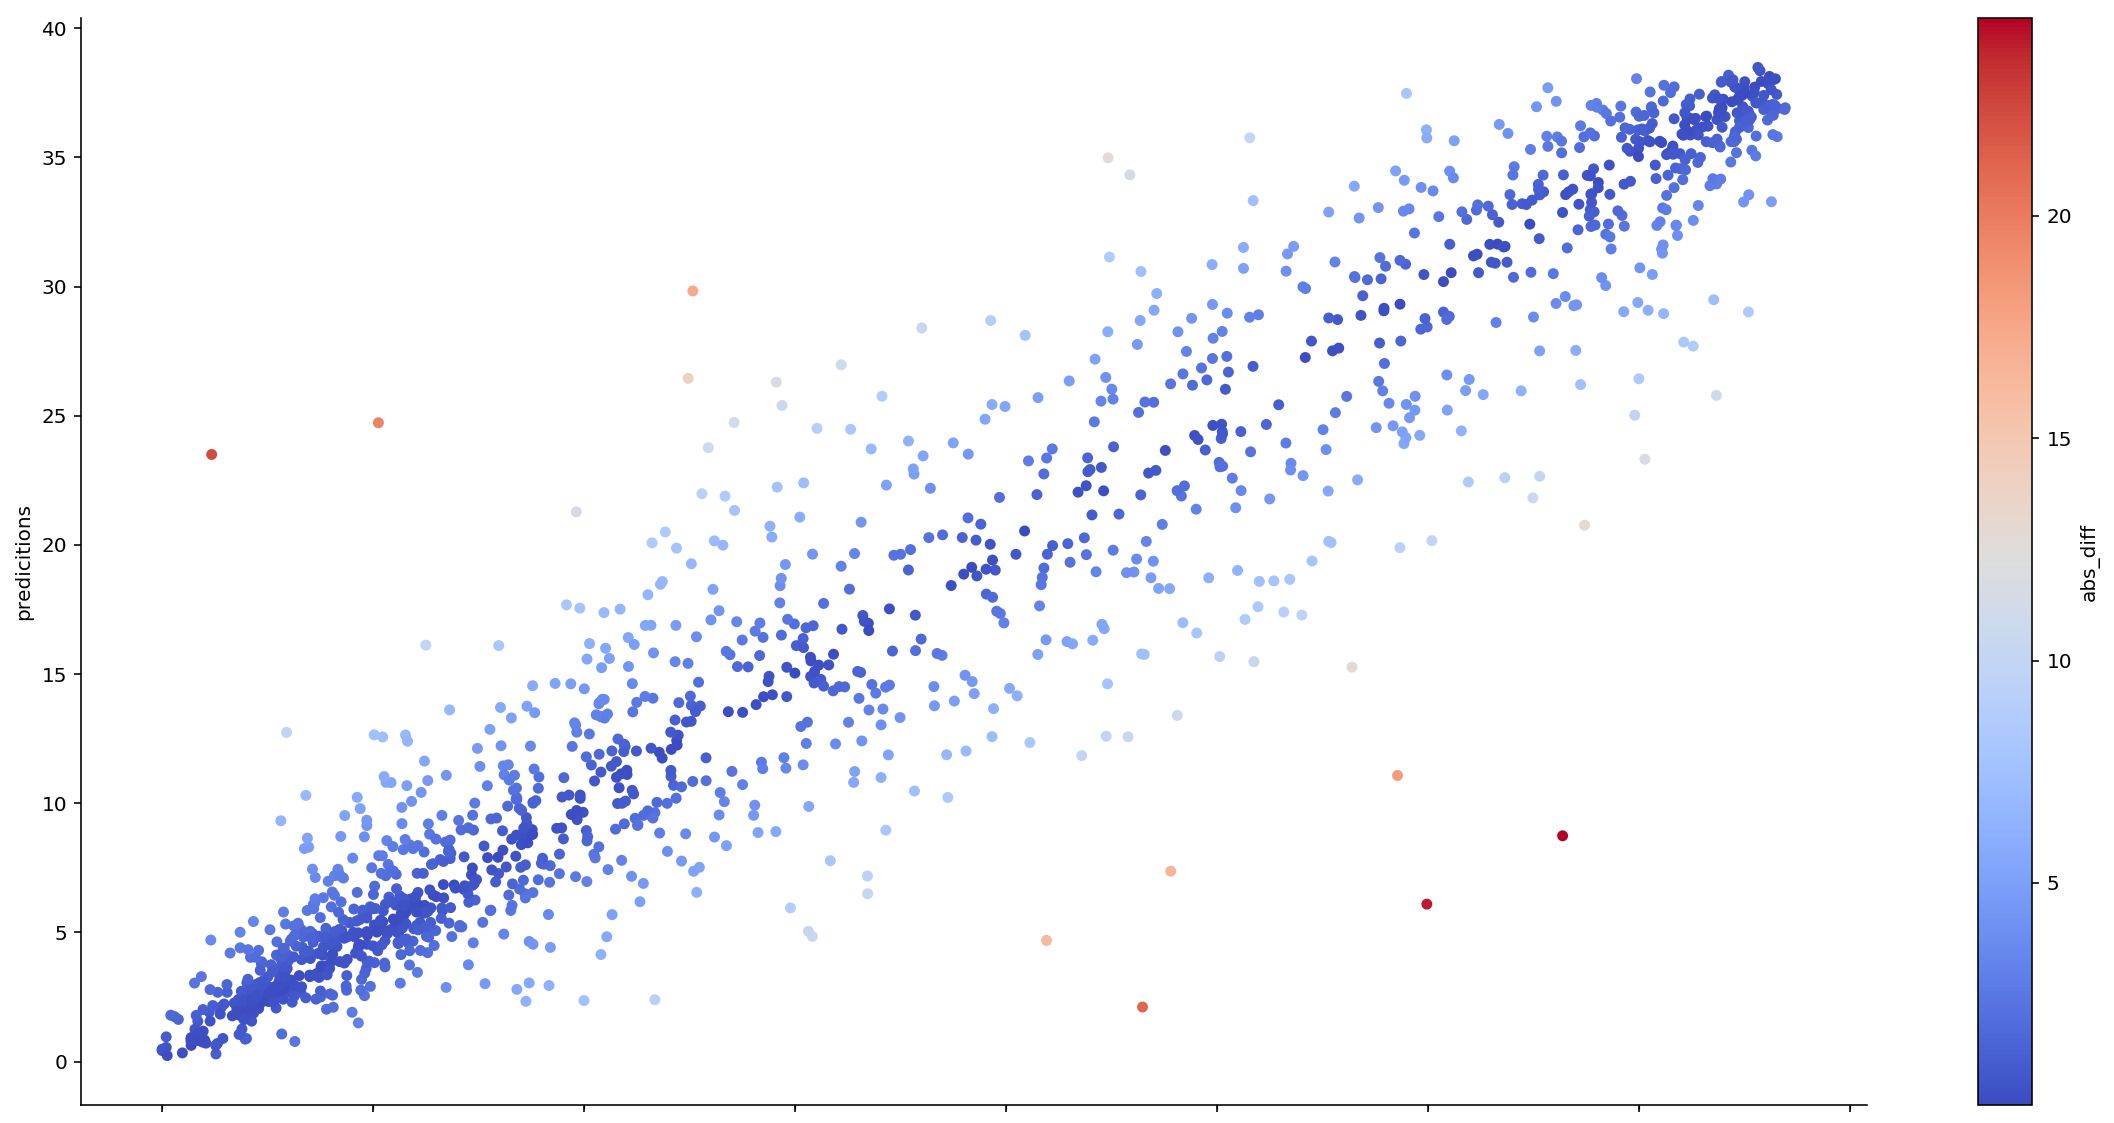

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

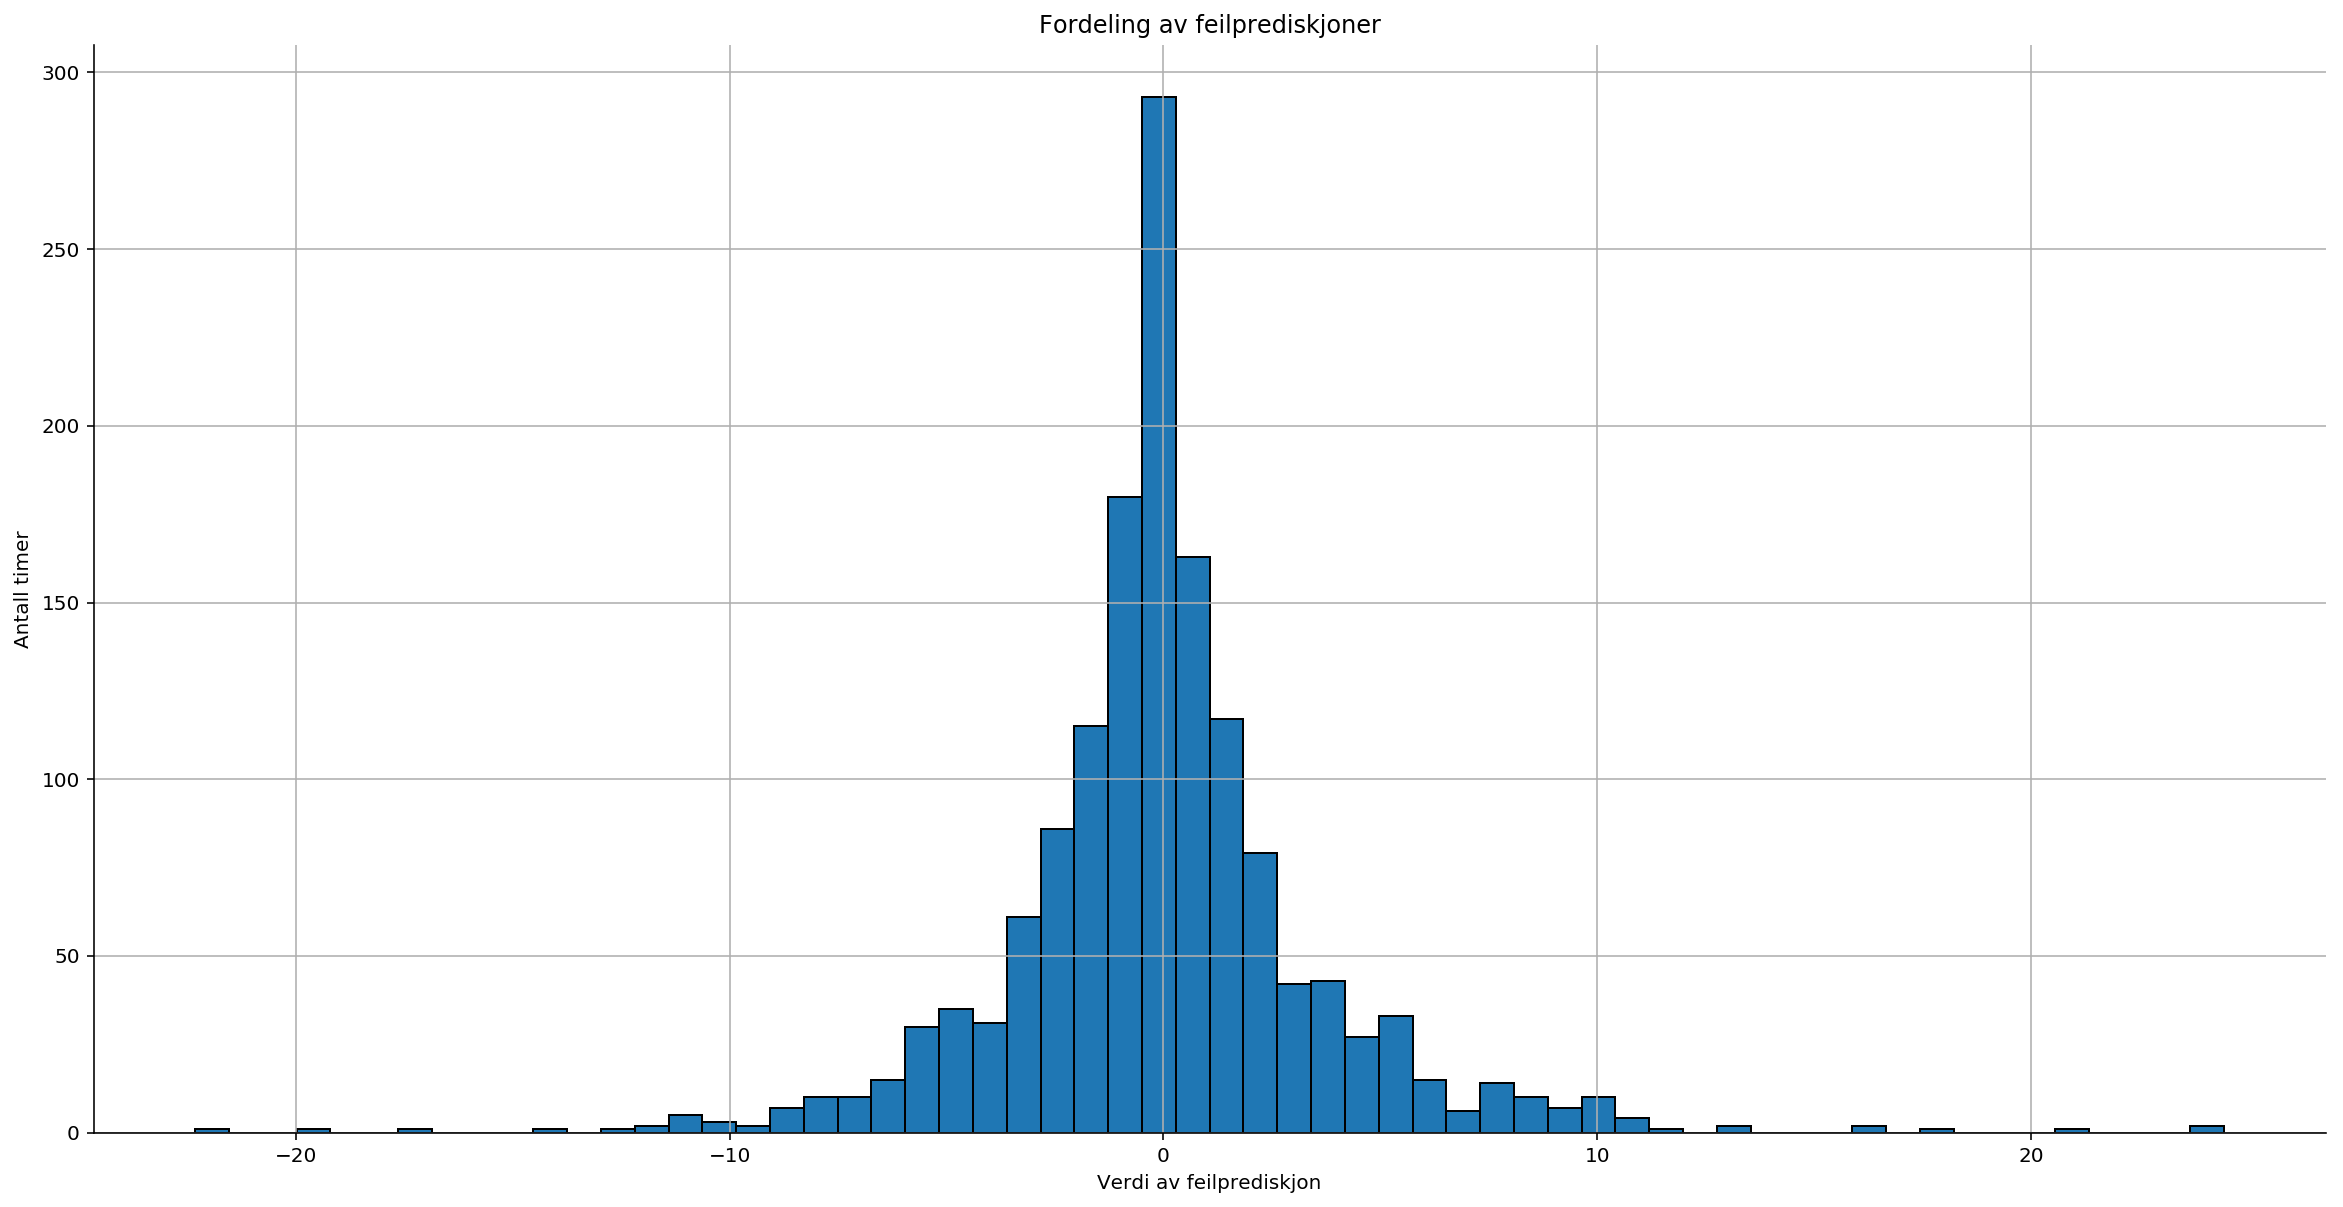

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

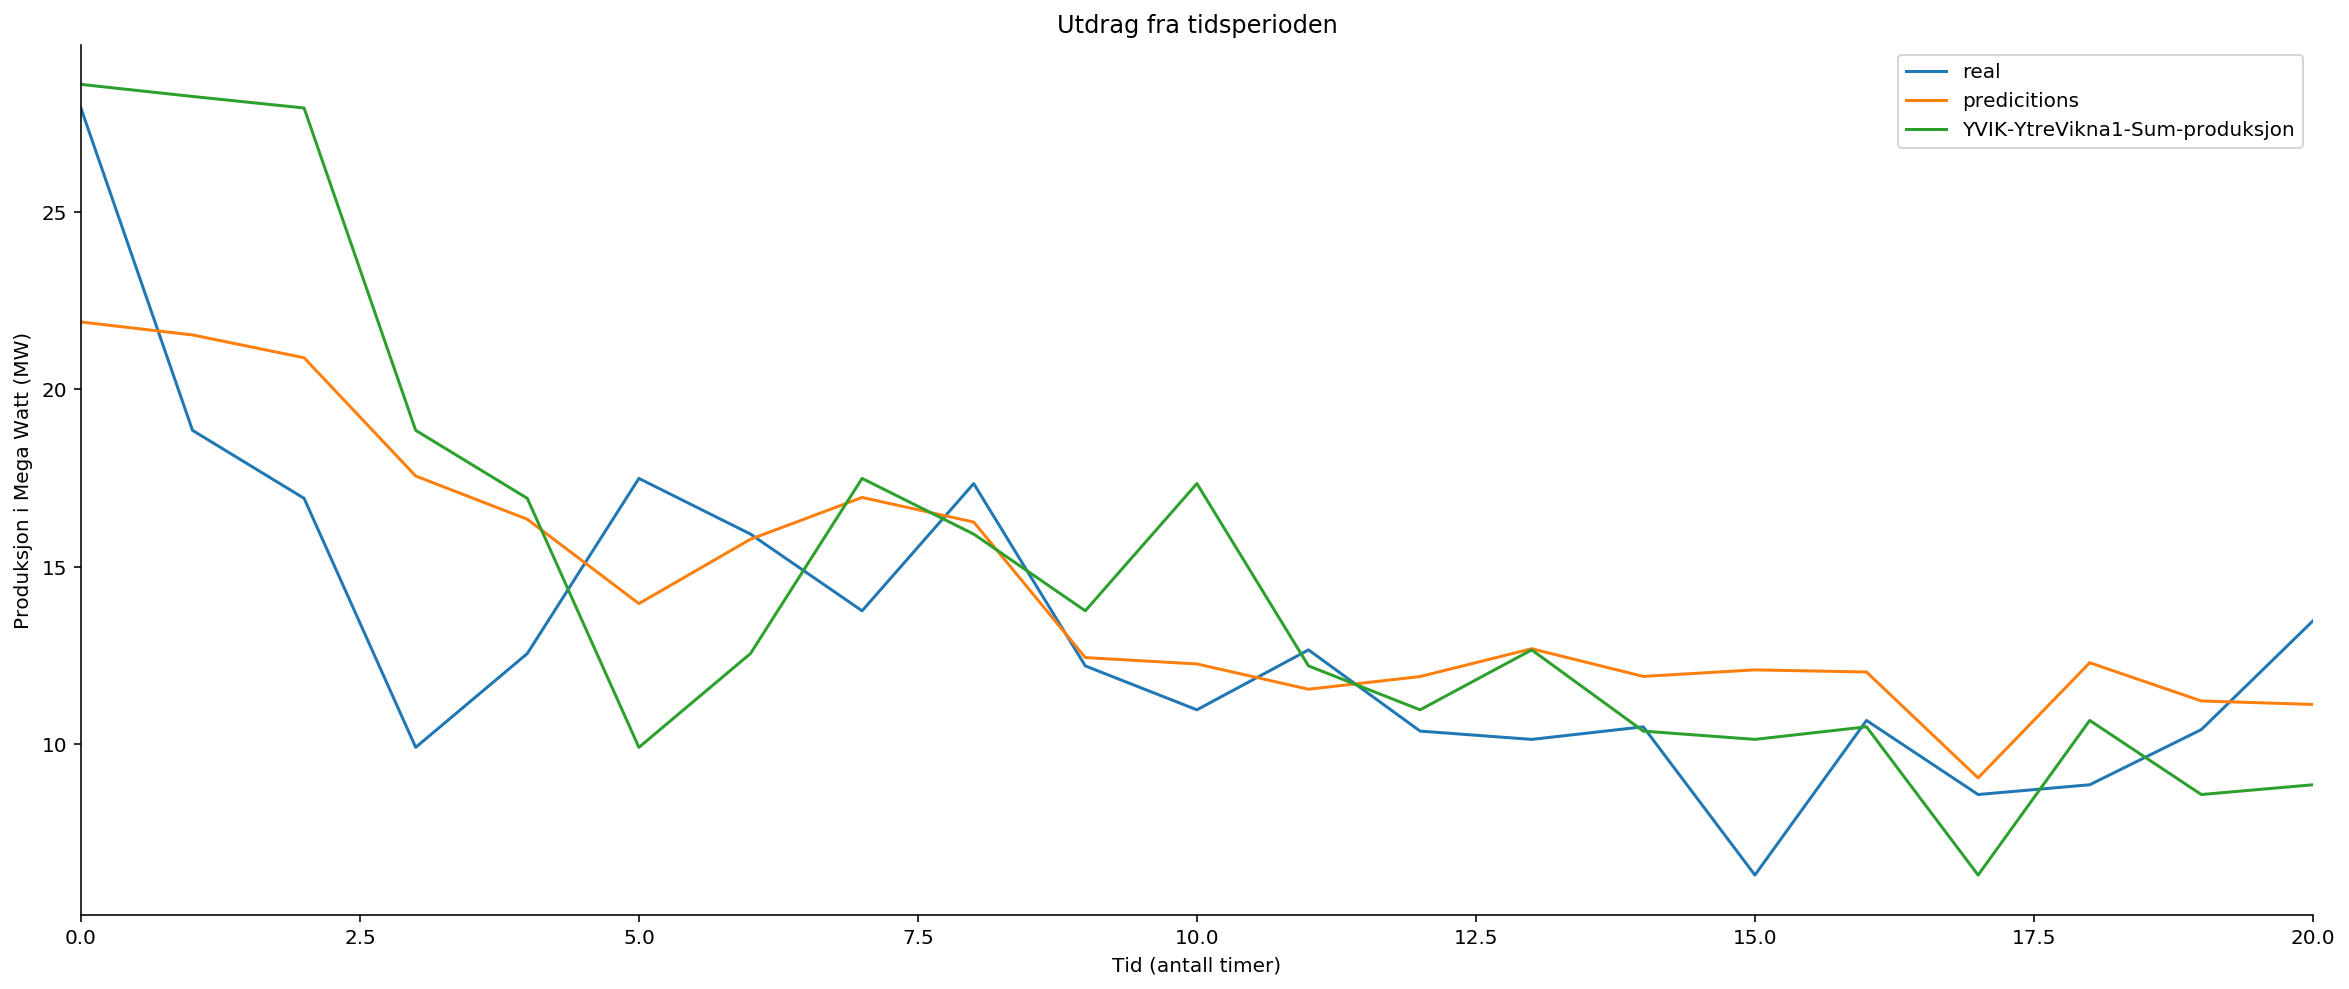

In [32]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')